# Classification -2

- [Dataset link](https://www.kaggle.com/wordsforthewise/lending-club)

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [64]:
data_info= pd.read_csv("../DATA/lending_club_info.csv", index_col="LoanStatNew")
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [65]:
data= pd.read_csv("../DATA/../DATA/lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<AxesSubplot:>

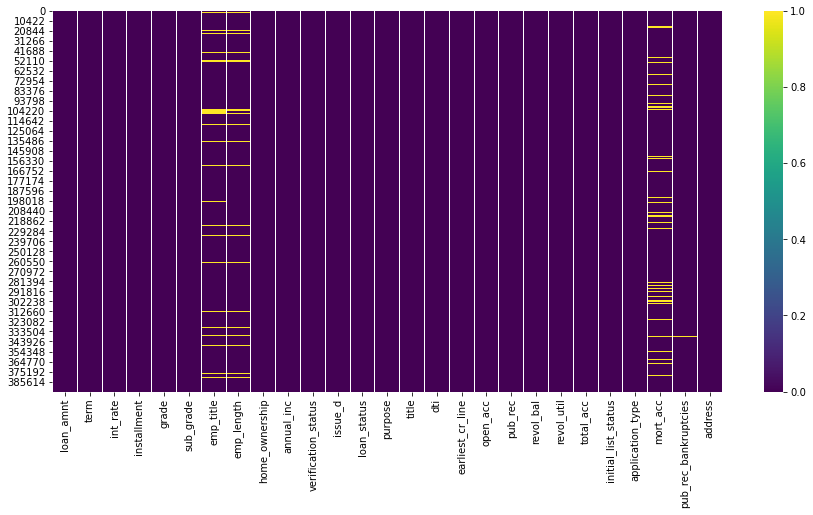

In [67]:
plt.figure(figsize=(15,7))
sns.heatmap(data.isnull(),cmap="viridis")

# 4 columns are having null values

In [68]:
sums= data.isnull().sum(axis=0)/data.size
sums[sums>0.0] * 100

emp_title               0.214415
emp_length              0.171152
title                   0.016413
revol_util              0.002581
mort_acc                0.353462
pub_rec_bankruptcies    0.005003
dtype: float64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

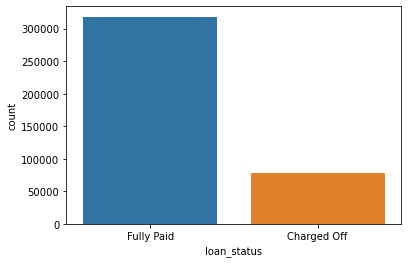

In [69]:
sns.countplot(x='loan_status',data=data)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

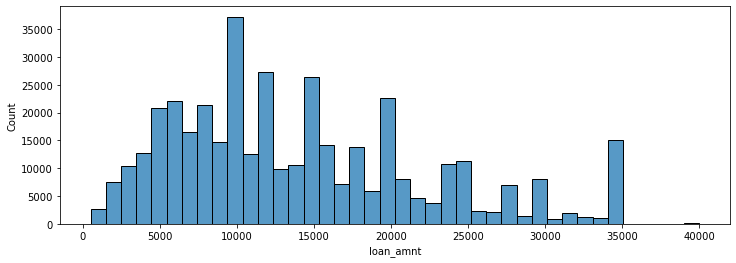

In [70]:
plt.figure(figsize=(12,4))
sns.histplot(data['loan_amnt'],kde=False,bins=40)

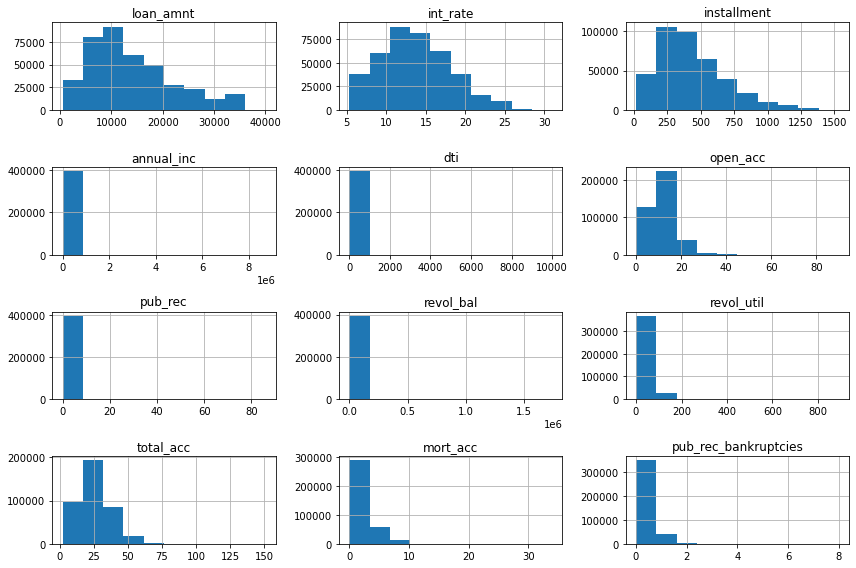

In [71]:
data.hist(figsize=(12,8))
plt.tight_layout()

<AxesSubplot:>

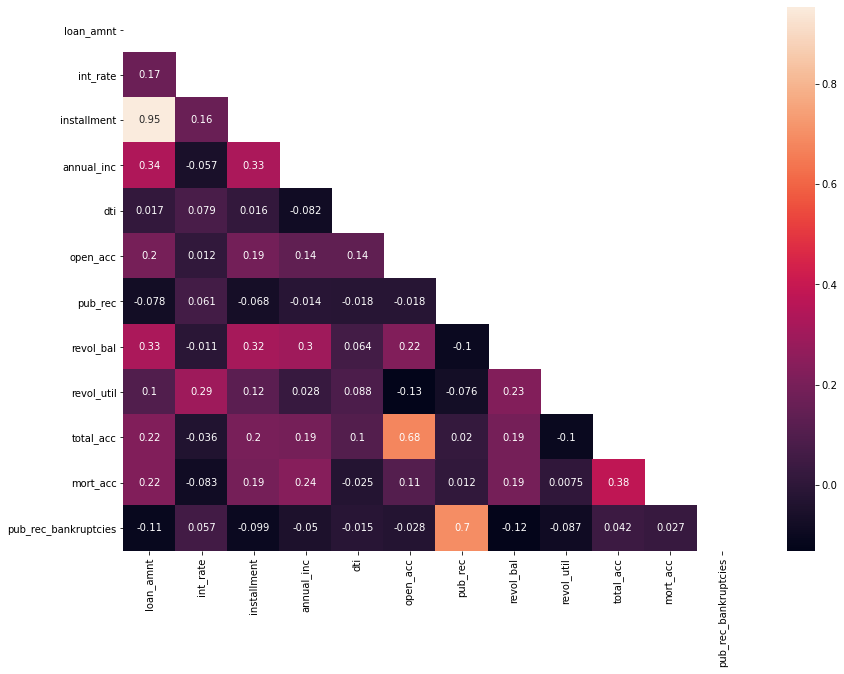

In [72]:
plt.figure(figsize=(14,10))
mat= data.corr()
sns.heatmap(mat, annot=True, mask=np.triu(mat))

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

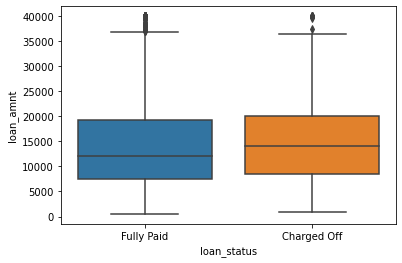

In [73]:
sns.boxplot(x="loan_status", y="loan_amnt", data=data)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

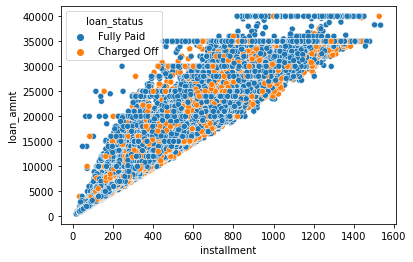

In [74]:
sns.scatterplot(x='installment',y='loan_amnt',data=data, hue="loan_status",)

In [75]:
data.grade.unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [76]:
data.sub_grade.unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

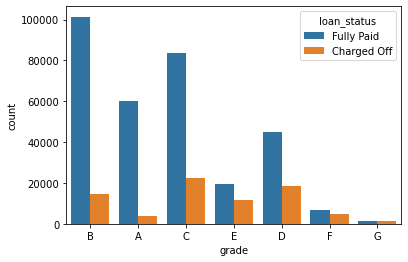

In [77]:
sns.countplot(x='grade',data=data,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

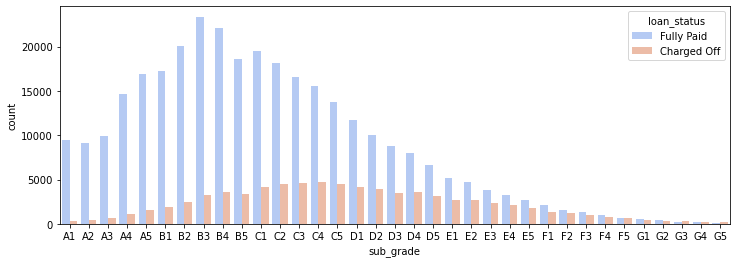

In [78]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(data['sub_grade'].unique())
sns.countplot(x='sub_grade',data=data,order = subgrade_order,palette='coolwarm',hue='loan_status' )

<AxesSubplot:>

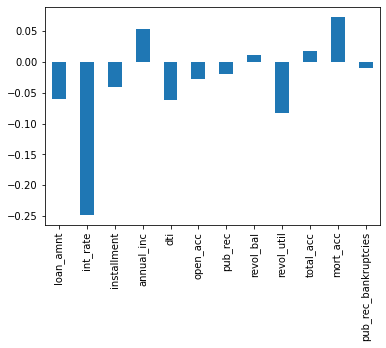

In [79]:
data['loan_repaid'] = data['loan_status'].map({'Fully Paid':1,'Charged Off':0})
data.corr().loan_repaid.drop("loan_repaid").plot(kind="bar")

In [80]:
#Missing Data

missing_cols= sums[sums>0.0].index

for col in missing_cols:
    info= data_info.loc[col]
    print(col,"==", info[0])


emp_title == The job title supplied by the Borrower when applying for the loan.*
emp_length == Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
title == The loan title provided by the borrower
revol_util == Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
mort_acc == Number of mortgage accounts.
pub_rec_bankruptcies == Number of public record bankruptcies


In [81]:
data['emp_title'].value_counts()

Teacher                         4389
Manager                         4250
Registered Nurse                1856
RN                              1846
Supervisor                      1830
                                ... 
Manager, IS Applications           1
Computer Plus                      1
Silver Spurs                       1
HALEDON POLICE                     1
food service worker, cashier       1
Name: emp_title, Length: 173105, dtype: int64

In [82]:
data = data.drop('emp_title',axis=1)

In [83]:
emp_length_order= sorted(data['emp_length'].dropna().unique())
# mapper={}

# for idx, col in enumerate(emp_length_order):
#     mapper[col]= idx+1

# mapper

<AxesSubplot:xlabel='emp_length', ylabel='count'>

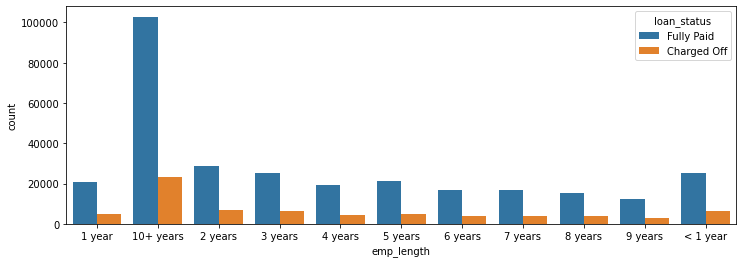

In [84]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=data,order=emp_length_order, hue="loan_status")

In [85]:
# data.emp_length = data.emp_length.map(mapper)

emp_co = data[data['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = data[data['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

emp_len = emp_co/emp_fp
emp_len


emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

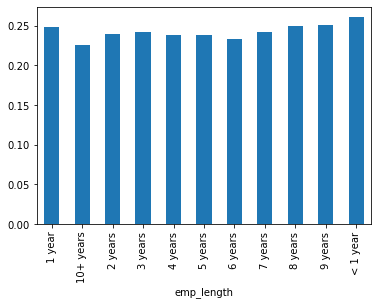

In [86]:
emp_len.plot(kind='bar')

In [87]:
data=  data.drop('emp_length',axis=1)

In [88]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [89]:
data.title.nunique()

48817

In [90]:
data = data.drop('title',axis=1)

In [91]:
data.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [92]:
total_acc_avg = data.groupby('total_acc').mean()['mort_acc']

def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [93]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [94]:
data = data.dropna()

In [95]:
data.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [96]:
data['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [97]:
# Or just use .map()
data['term'] = data['term'].apply(lambda term: int(term[:3]))

In [98]:
# We already know grade is part of sub_grade, so just drop the grade feature
data = data.drop('grade',axis=1)

In [111]:
subgrade_dummies = pd.get_dummies(data['sub_grade'],drop_first=True)
data = pd.concat([data.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [109]:
dummies = pd.get_dummies(data[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
data = data.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
data = pd.concat([data,dummies],axis=1)

In [101]:
data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [102]:
data['home_ownership']=data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(data['home_ownership'],drop_first=True)
data = data.drop('home_ownership',axis=1)
data = pd.concat([data,dummies],axis=1)

In [104]:
data['zip_code'] = data['address'].apply(lambda address:address[-5:])

dummies = pd.get_dummies(data['zip_code'],drop_first=True)
data = data.drop(['zip_code','address'],axis=1)
data = pd.concat([data,dummies],axis=1)

In [106]:
data = data.drop('issue_d',axis=1)

In [107]:
data['earliest_cr_year'] = data['earliest_cr_line'].apply(lambda date:int(date[-4:]))
data = data.drop('earliest_cr_line',axis=1)

In [112]:
data.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [113]:
from sklearn.model_selection import train_test_split

data = data.drop('loan_status',axis=1)

X = data.drop('loan_repaid',axis=1).values
y = data['loan_repaid'].values

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [117]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [118]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.3011 - val_loss: 0.2643
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2655 - val_loss: 0.2632
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2625 - val_loss: 0.2623
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2615 - val_loss: 0.2621
Epoch 5/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2606 - val_loss: 0.2617
Epoch 6/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2601 - val_loss: 0.2617
Epoch 7/25
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2599 - val_loss: 0.2621
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2596 - val_loss: 0.2612
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2591 - val_loss: 0.2616
Epoch 10/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.258

<AxesSubplot:>

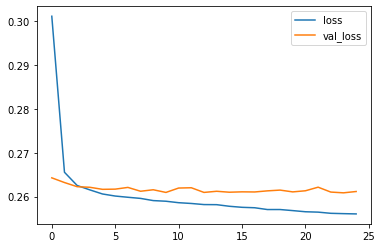

In [119]:
losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()

In [120]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(X_test)

'''
 *  `np.argmax(model.predict(x), axis=-1)`,  
     if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).
 
 *  `(model.predict(x) > 0.5).astype("int32")`,   
     if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
''''


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [121]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



<AxesSubplot:>

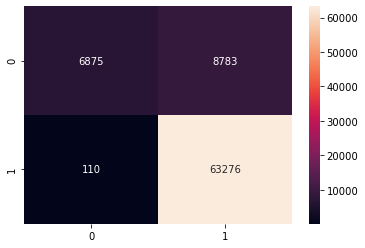

In [124]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True, fmt="d")